In [41]:
print("Hello World!")

Hello World!


In [42]:
# importing relevant modules
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from datetime import datetime

## Capital Bike Share

## Loading Daily Dataset

In [43]:
# loading csv file
day=pd.read_csv("day.csv", sep=None)

C:\Users\godwi\AppData\Local\Temp\ipykernel_25472\2546809199.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  day=pd.read_csv("day.csv", sep=None)


In [44]:
# getting summary of Data set
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


## Data Wrangling

Checking for missing values

In [45]:
day.isnull().sum()

#There are no missing values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Renaming some features

In [46]:
## renaming some features
day.rename(columns={'cnt': 'Total_rides'}, inplace=True)

## Creating of new columns

In [47]:
#Season
# Function to get season
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"

# Function to categorize season based on date
def categorize_season(date):
    dt = datetime.strptime(date, "%Y-%m-%d")
    month = dt.month
    return get_season(month)

# Apply function to create a new column
day['Season'] = day['dteday'].apply(categorize_season)


In [48]:
##WEEKDAY
# Function to get weekday
def get_weekday(day):
    weekdays = ["Mon.", "Tue.", "Wed.", "Thur.", "Fri.", "Sat.", "Sun."]
    return weekdays[day]

# Function to categorize weekday based on date
def categorize_week(date):
    dt = datetime.strptime(date, "%Y-%m-%d")
    weekday = dt.weekday()  # 0 for Monday, 1 for Tuesday, ..., 6 for Sunday
    return get_weekday(weekday)

# Apply function to create a new column
day['Weekday'] = day['dteday'].apply(categorize_week)

In [49]:
#Month
# Function to get month
def get_month(month):
    months = ["Jan.", "Feb.", "Mar.", "Apr.", "May", "Jun.", "Jul.", "Aug.", "Sep.", "Oct.", "Nov.", "Dec."]
    return months[month - 1]

# Function to categorize month based on date
def categorize_month(date):
    dt = datetime.strptime(date, "%Y-%m-%d")
    month = dt.month
    return get_month(month)

# Apply function to create a new column
day['Month'] = day['dteday'].apply(categorize_month)

In [50]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,Total_rides,Season,Weekday,Month
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Winter,Sat.,Jan.
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Winter,Sun.,Jan.
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Winter,Mon.,Jan.
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Winter,Tue.,Jan.
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Winter,Wed.,Jan.


In [51]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   instant      731 non-null    int64  
 1   dteday       731 non-null    object 
 2   season       731 non-null    int64  
 3   yr           731 non-null    int64  
 4   mnth         731 non-null    int64  
 5   holiday      731 non-null    int64  
 6   weekday      731 non-null    int64  
 7   workingday   731 non-null    int64  
 8   weathersit   731 non-null    int64  
 9   temp         731 non-null    float64
 10  atemp        731 non-null    float64
 11  hum          731 non-null    float64
 12  windspeed    731 non-null    float64
 13  casual       731 non-null    int64  
 14  registered   731 non-null    int64  
 15  Total_rides  731 non-null    int64  
 16  Season       731 non-null    object 
 17  Weekday      731 non-null    object 
 18  Month        731 non-null    object 
dtypes: float

2011 Data Frame

In [52]:
# Convert 'dteday' column to datetime type
day['dteday'] = pd.to_datetime(day['dteday'])

# Filter the DataFrame for rows where the year is 2011
day_2011 = day[day["dteday"].dt.year == 2011]


In [53]:
# resetting index
day_2011.reset_index(inplace=True)
#dropping the index column
day_2011.drop(["index"],axis=1, inplace=True)

C:\Users\godwi\AppData\Local\Temp\ipykernel_25472\2001717278.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_2011.drop(["index"],axis=1, inplace=True)


In [54]:
day_2011.shape

(365, 19)

2012 Data Frame

In [55]:
# Convert 'dteday' column to datetime type
day['dteday'] = pd.to_datetime(day['dteday'])

# Filter the DataFrame for rows where the year is 2011
day_2012 = day[day["dteday"].dt.year == 2012]


In [56]:
# resetting index
day_2012.reset_index(inplace=True)
#dropping the index column
day_2012.drop(["index"],axis=1, inplace=True)

C:\Users\godwi\AppData\Local\Temp\ipykernel_25472\3435614798.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_2012.drop(["index"],axis=1, inplace=True)


In [57]:
day_2012.shape

(366, 19)

## Exploratory Data Analysis

In [58]:
day_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      366 non-null    int64         
 1   dteday       366 non-null    datetime64[ns]
 2   season       366 non-null    int64         
 3   yr           366 non-null    int64         
 4   mnth         366 non-null    int64         
 5   holiday      366 non-null    int64         
 6   weekday      366 non-null    int64         
 7   workingday   366 non-null    int64         
 8   weathersit   366 non-null    int64         
 9   temp         366 non-null    float64       
 10  atemp        366 non-null    float64       
 11  hum          366 non-null    float64       
 12  windspeed    366 non-null    float64       
 13  casual       366 non-null    int64         
 14  registered   366 non-null    int64         
 15  Total_rides  366 non-null    int64         
 16  Season  

In [59]:
season_analysis_2012=day_2012.iloc[:,[16,13,14,15]]

In [60]:
season_analysis_2012_copy= season_analysis_2012.copy()
season_analysis_2012

,Season,casual,registered,Total_rides
0,Winter,686,1608,2294
1,Winter,244,1707,1951
2,Winter,89,2147,2236
3,Winter,95,2273,2368
4,Winter,140,3132,3272
...,...,...,...,...
361,Winter,247,1867,2114
362,Winter,644,2451,3095
363,Winter,159,1182,1341
364,Winter,364,1432,1796


In [61]:
season_analysis_result=season_analysis_2012.groupby("Season").sum()

Text(0, 0.5, 'Total_rides')

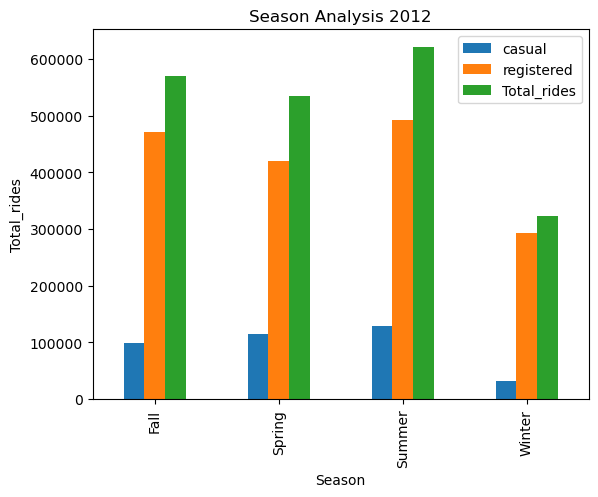

In [62]:
#sns.barplot(data=season_analysis_result)
season_analysis_result.plot.bar()
plt.title("Season Analysis 2012")
plt.ylabel("Total_rides")

In [63]:
season_analysis_2012_copy.drop(["Total_rides"], axis=1, inplace=True)

In [65]:
season_analysis_2012_copy

,Season,casual,registered
0,Winter,686,1608
1,Winter,244,1707
2,Winter,89,2147
3,Winter,95,2273
4,Winter,140,3132
...,...,...,...
361,Winter,247,1867
362,Winter,644,2451
363,Winter,159,1182
364,Winter,364,1432


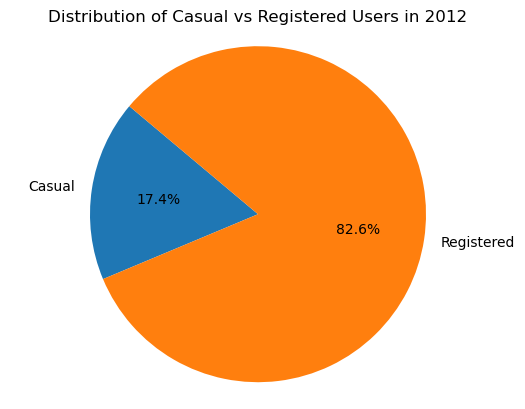

In [66]:
# Sample data


# Aggregate data by summing up 'Casual' and 'Registered' counts
season_counts = season_analysis_2012_copy.groupby('Season').sum().reset_index()

# Plotting
labels = ['Casual', 'Registered']
sizes = season_counts.loc[0, ['casual', 'registered']].values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Title
plt.title('Distribution of Casual vs Registered Users in 2012')

# Show plot
plt.show()


Text(0.5, 1.0, 'Ride Count based on Daily Apperent Temperature in 2012')

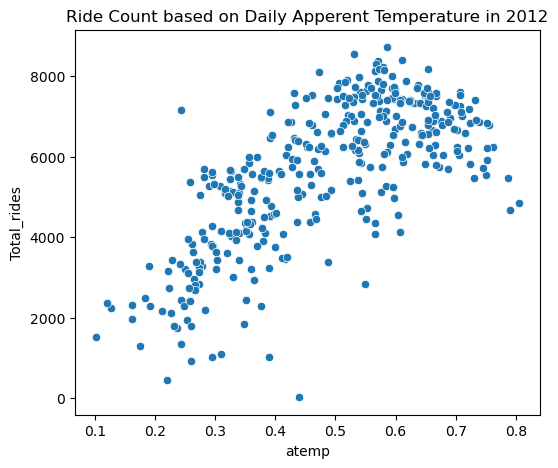

In [64]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x="atemp", y="Total_rides",
      
             data=day_2012)
plt.title("Ride Count based on Daily Apperent Temperature in 2012")